Análisis Exploratorio de Datos o EDA 

*****************
importo las librerías y cargo el dataset
*****************

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
sns.set()
from scipy import stats
import matplotlib.pyplot as plt

#import ColumnTransforme_regression


In [2]:
properties_colombia_csv=pd.read_csv(r'C:\Users\ROXI\OneDrive\Escritorio\datathon\Datathon\properties_colombia_test.csv',encoding='utf8')

In [3]:
properties_colombia_csv.shape

(65850, 26)

In [4]:
properties_colombia_csv.head(2)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,2020-09-04,4.722,-74.075,Colombia,Cundinamarca,...,3.0,660.0,350.0,COP,NaN,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,...,3.0,NaN,NaN,COP,Mensual,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY


In [3]:
properties_colombia_csv = properties_colombia_csv.replace("nan",np.nan)

In [4]:
properties_colombia_csv = properties_colombia_csv.replace("NaN",np.nan)

In [6]:
properties_colombia_csv.isnull().sum()

Unnamed: 0             0
id                     0
ad_type                0
start_date             0
end_date               0
created_on             0
lat                16417
lon                16417
l1                     0
l2                     0
l3                  3657
l4                 50776
l5                 56798
l6                 63486
rooms              56740
bedrooms           52447
bathrooms          13796
surface_total      63536
surface_covered    62545
currency              17
price_period       53729
title                  0
description           27
property_type          0
operation_type         0
geometry               0
dtype: int64

In [5]:
len_csv=properties_colombia_csv.shape

In [6]:
is_null=((properties_colombia_csv.isnull().sum())*100)/len_csv[0]

porcentaje de nulos por columna si es mayor a 30% la columna se borra
l6                 % 96.523900
surface_total      % 96.469737
surface_covered    % 95.038193
l5                 % 86.125468
rooms              % 86.060674
price_period       % 81.791353
bedrooms           % 79.486102
l4                 % 77.035065

In [10]:
is_null.sort_values(ascending=False)

surface_total      96.485953
l6                 96.410023
surface_covered    94.981017
l5                 86.253607
rooms              86.165528
price_period       81.593014
bedrooms           79.646166
l4                 77.108580
lat                24.930904
lon                24.930904
bathrooms          20.950645
l3                  5.553531
description         0.041002
currency            0.025816
title               0.000000
property_type       0.000000
operation_type      0.000000
Unnamed: 0          0.000000
id                  0.000000
l2                  0.000000
l1                  0.000000
created_on          0.000000
end_date            0.000000
start_date          0.000000
ad_type             0.000000
geometry            0.000000
dtype: float64

In [11]:
properties_colombia_csv.nunique()

Unnamed: 0         65850
id                 65850
ad_type                1
start_date           145
end_date             438
created_on           145
lat                24813
lon                24225
l1                     1
l2                    31
l3                   262
l4                    55
l5                    19
l6                   121
rooms                 26
bedrooms              32
bathrooms             19
surface_total        585
surface_covered      521
currency               2
price_period           1
title              43299
description        47494
property_type          8
operation_type         1
geometry           30213
dtype: int64

cantidad de datos unicos en columna l3

In [12]:
properties_colombia_csv.l3.value_counts().sort_values(ascending=False)

Medellín         14433
Bogotá D.C        9492
Cali              6861
Barranquilla      5162
Manizales         4688
                 ...  
Tibaná               1
Hispania             1
Caicedonia           1
Puerto Lleras        1
Fuente de Oro        1
Name: l3, Length: 262, dtype: int64

borro las columnas:
*ad_type porque no aporta valor en la prediccion tiene un solo dato: "Propiedad"
*id porque no aporta valor significativo a la prediccion al ser numeros consecutivos
*Unnamed: 0 porque no aporta valor significativo a la prediccion
*si es mayor a 30% lo porcentajes de nan en la columna se borra la columna
*al tener lat y lon en col separadas borro la columna geometry porque es redundante
*l1 porque no aporta valor en la prediccion tiene un solo dato:colombia
*operation_type porque no aporta valor en la prediccion tiene un solo dato:venta

In [7]:
properties_colombia_csv=properties_colombia_csv.drop(columns=["ad_type","Unnamed: 0","id","l6","surface_covered","surface_total","l5","rooms","price_period","bedrooms","l4","geometry","l1","operation_type","title","description"])

In [267]:
#properties_colombia_csv=properties_colombia_csv.drop(properties_colombia_csv.columns[13], axis='columns')

In [8]:
properties_colombia_csv.to_csv("columbia_houses_test.csv", index=False)

latitud
-4 a 12
longuitud
-65 a-79

coordenadas invalidas

In [9]:
properties_colombia_csv[properties_colombia_csv["lat"]<-4]

,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,currency,property_type
5114,2020-12-12,9999-12-31,2020-12-12,-4.203165,-69.935907,Amazonas,Leticia,NaN,COP,Lote


In [16]:
properties_colombia_csv[properties_colombia_csv["lat"]>12]

,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,currency,property_type
504,2020-09-01,9999-12-31,2020-09-01,13.338761,-81.372937,San Andrés Providencia y Santa Catalina,NaN,NaN,COP,Finca
3466,2020-10-28,2020-10-28,2020-10-28,12.585000,-81.696000,San Andrés Providencia y Santa Catalina,San Andrés,NaN,COP,Lote
29806,2020-10-23,2020-11-30,2020-10-23,12.576855,-81.705052,San Andrés Providencia y Santa Catalina,San Andrés,2.0,COP,Apartamento
63269,2020-12-01,2021-04-28,2020-12-01,12.582863,-81.689811,San Andrés Providencia y Santa Catalina,San Andrés,2.0,COP,Apartamento


In [17]:
properties_colombia_csv[properties_colombia_csv["lon"]>-65]

,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,currency,property_type


In [18]:
properties_colombia_csv[properties_colombia_csv["lon"]<-79]

,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,currency,property_type
504,2020-09-01,9999-12-31,2020-09-01,13.338761,-81.372937,San Andrés Providencia y Santa Catalina,NaN,NaN,COP,Finca
3466,2020-10-28,2020-10-28,2020-10-28,12.585000,-81.696000,San Andrés Providencia y Santa Catalina,San Andrés,NaN,COP,Lote
29806,2020-10-23,2020-11-30,2020-10-23,12.576855,-81.705052,San Andrés Providencia y Santa Catalina,San Andrés,2.0,COP,Apartamento
63269,2020-12-01,2021-04-28,2020-12-01,12.582863,-81.689811,San Andrés Providencia y Santa Catalina,San Andrés,2.0,COP,Apartamento


In [41]:
#properties_colombia_csv=properties_colombia_csv.drop(properties_colombia_csv.columns[9], axis='columns')

busco los datos de latitud y longitud faltantes 

In [10]:
lat_lon_df=properties_colombia_csv[properties_colombia_csv["lat"].isnull()] 

In [11]:
properties_colombia_csv[properties_colombia_csv["lat"].isnull()] 

,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,currency,property_type
1,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Antioquia,Envigado,3.0,COP,Apartamento
4,2020-12-10,2020-12-11,2020-12-10,NaN,NaN,Antioquia,Medellín,2.0,COP,Casa
9,2020-12-29,2020-12-30,2020-12-29,NaN,NaN,Antioquia,Medellín,2.0,COP,Apartamento
12,2020-12-22,2020-12-23,2020-12-22,NaN,NaN,Antioquia,Medellín,NaN,COP,Lote
13,2020-11-20,2020-11-21,2020-11-20,NaN,NaN,Amazonas,Leticia,1.0,COP,Casa
...,...,...,...,...,...,...,...,...,...,...
65832,2020-11-27,2021-09-09,2020-11-27,NaN,NaN,Atlántico,Barranquilla,4.0,COP,Apartamento
65834,2020-09-10,2020-09-16,2020-09-10,NaN,NaN,Antioquia,Envigado,2.0,COP,Apartamento
65838,2020-12-28,2020-12-29,2020-12-28,NaN,NaN,Antioquia,Medellín,5.0,COP,Casa
65844,2020-11-23,2021-02-22,2020-11-23,NaN,NaN,Cauca,Popayán,2.0,COP,Apartamento


In [12]:
df_geo=pd.DataFrame(lat_lon_df.l2.value_counts())

In [13]:
df_geo

,l2
Antioquia,11262
Atlántico,1037
Cundinamarca,992
Valle del Cauca,656
Santander,544
Risaralda,453
Caldas,423
Meta,246
Cauca,209
Bolívar,157


In [14]:
df_geo['texto'] = df_geo.index

In [15]:
df_geo

,l2,texto
Antioquia,11262,Antioquia
Atlántico,1037,Atlántico
Cundinamarca,992,Cundinamarca
Valle del Cauca,656,Valle del Cauca
Santander,544,Santander
Risaralda,453,Risaralda
Caldas,423,Caldas
Meta,246,Meta
Cauca,209,Cauca
Bolívar,157,Bolívar


In [16]:
list_geo=list(df_geo["texto"])

In [17]:
list_geo[0]

'Antioquia'

veo los datos unicos de las columnas que quedan

In [18]:
properties_colombia=['l2', 'l3',"currency","property_type",'bathrooms']

listproperties_colombia=list(properties_colombia)

#ver valores unicos en las columnas
for indice,columns_properties in enumerate(listproperties_colombia) :
    print(columns_properties)
    sort_properties =properties_colombia_csv[columns_properties].sort_values()
    listaproperties=sort_properties.unique()
    print(listaproperties)

l2
['Amazonas' 'Antioquia' 'Arauca' 'Atlántico' 'Bolívar' 'Boyacá' 'Caldas'
 'Caquetá' 'Casanare' 'Cauca' 'Cesar' 'Chocó' 'Cundinamarca' 'Córdoba'
 'Guainía' 'Guaviare' 'Huila' 'La Guajira' 'Magdalena' 'Meta' 'Nariño'
 'Norte de Santander' 'Putumayo' 'Quindío' 'Risaralda'
 'San Andrés Providencia y Santa Catalina' 'Santander' 'Sucre' 'Tolima'
 'Valle del Cauca' 'Vichada']
l3
['Abejorral' 'Acacías' 'Acandí' 'Agua de Dios' 'Aguazul' 'Aipe' 'Albán'
 'Alvarado' 'Anapoima' 'Andalucía' 'Anolaima' 'Anserma' 'Apulo' 'Arauca'
 'Arbeláez' 'Arjona' 'Armenia' 'Baranoa' 'Barbosa' 'Barichara'
 'Barrancabermeja' 'Barranquilla' 'Bello' 'Bochalema' 'Bogotá D.C'
 'Bojacá' 'Bucaramanga' 'Cabrera' 'Cachipay' 'Caicedonia' 'Cajicá'
 'Calarca' 'Caldas' 'Cali' 'Calima' 'Candelaria' 'Caparrapí'
 'Carmen de Apicalá' 'Cartagena' 'Cartago' 'Chaparral' 'Chigorodó'
 'Chinauta' 'Chinácota' 'Chipaque' 'Chiquinquirá' 'Chocontá' 'Chía'
 'Cimitarra' 'Clemencia' 'Cogua' 'Colombia' 'Copacabana' 'Cota' 'Coveñas'
 'Cucunubá

In [22]:
properties_colombia_csv.isnull().sum()

start_date           0
end_date             0
created_on           0
lat              16417
lon              16417
l2                   0
l3                3657
bathrooms        13796
currency            17
property_type        0
dtype: int64

busco la coordenada de la columna l2 con mas nan (faltantes)

In [19]:
df_l2=properties_colombia_csv[properties_colombia_csv.l2==list_geo[0]]


In [20]:
geo_l2=df_l2[df_l2.columns[[3,4]]]

In [21]:
list_l2_loc=geo_l2.iloc[2]

In [22]:
print("latitud mas repetida en los datos faltantes para la columna l2: ",list_l2_loc[0])
print("longuitud mas repetida en los datos faltantes para la columna l2: ",list_l2_loc[1])

latitud mas repetida en los datos faltantes para la columna l2:  6.203
longuitud mas repetida en los datos faltantes para la columna l2:  -75.556


In [33]:
properties_colombia_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   start_date     65850 non-null  object 
 1   end_date       65850 non-null  object 
 2   created_on     65850 non-null  object 
 3   lat            49433 non-null  float64
 4   lon            49433 non-null  float64
 5   l2             65850 non-null  object 
 6   l3             62193 non-null  object 
 7   bathrooms      52054 non-null  float64
 8   currency       65833 non-null  object 
 9   property_type  65850 non-null  object 
dtypes: float64(3), object(7)
memory usage: 5.0+ MB


reemplazo los faltantes con la coordenada correspondiente a un dato de la columna l2 que se repite con mas frecuencia

In [23]:
properties_colombia_csv.lat = properties_colombia_csv["lat"].replace(np.nan,list_l2_loc[0])

In [24]:
properties_colombia_csv.lon = properties_colombia_csv["lon"].replace(np.nan,list_l2_loc[1])

In [29]:
properties_colombia_csv[properties_colombia_csv.lon.isnull()]

,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,currency,property_type


In [25]:
properties_colombia_csv.to_csv("columbia_houses_test.csv", index=False)

In [38]:
properties_colombia_csv.shape

(65850, 10)

In [39]:
properties_colombia_csv.describe()

,lat,lon,bathrooms
count,65850.000000,65850.000000,52054.000000
mean,5.815544,-75.170268,2.639624
std,1.933944,0.977128,1.426015
min,-4.203165,-81.705052,1.000000
25%,4.678865,-75.576824,2.000000
50%,6.167287,-75.556000,2.000000
75%,6.203000,-74.234149,3.000000
max,13.338761,-67.924336,20.000000


In [40]:
properties_colombia_csv.isnull().sum()

start_date           0
end_date             0
created_on           0
lat                  0
lon                  0
l2                   0
l3                3657
bathrooms        13796
currency            17
property_type        0
dtype: int64

compruebo el formato de las fechas

In [31]:
def ver_formato_fecha(df, column):
    df = df.copy()
    df[column]=df[column].astype('str')
    new2 = df[column].str.split("-", n = 2, expand = True)
    list_new_cero=list(new2[0])
    list_new_uno=list(new2[1])
    list_new_dos=list(new2[2])
    
    list_new_cero=list(set(list_new_cero))
    list_new_uno=list(set(list_new_uno))
    list_new_dos=list(set(list_new_dos))

    print("columna",column,"años :",list_new_cero)
    print("meses",list_new_uno)
    print("cantidad de dias",len(list_new_dos))
    
    return 

In [58]:
ver_formato_fecha(properties_colombia_csv, "start_date")

columna start_date años : ['2020']
meses ['09', '08', '07', '11', '10', '12']
cantidad de dias 31


In [59]:
ver_formato_fecha(properties_colombia_csv, "end_date")

columna end_date años : ['2020', '2021', '9999']
meses ['09', '01', '08', '05', '02', '04', '07', '11', '10', '03', '12', '06']
cantidad de dias 31


In [60]:
ver_formato_fecha(properties_colombia_csv, "created_on")

columna created_on años : ['2020']
meses ['09', '08', '07', '11', '10', '12']
cantidad de dias 31


In [26]:
#proceso las fechas para poder escalar
def separo_fechas_en_columnas_diferente(df, column):
    df = df.copy()
    df[column]=df[column].astype('str')
    new2 = df[column].str.split("-", n = 2, expand = True)
    df[column + '_year']=new2[0]
    df[column + '_month']=new2[1]
    df[column + '_day']=new2[2]
    df[column + '_year']=df[column + '_year'].astype("int")
    df[column + '_month']=df[column + '_month'].astype("int")
    df[column + '_day']=df[column + '_day'].astype("int")
    df = df.drop(column, axis=1)
    return df

In [ ]:
#proceso las fechas para poder escalar

In [27]:
new_df=separo_fechas_en_columnas_diferente(properties_colombia_csv, "created_on")

In [28]:
new_df1=separo_fechas_en_columnas_diferente(new_df, "end_date")


In [29]:
new_df2=separo_fechas_en_columnas_diferente(new_df1, "start_date") 

para no tener datos repetidos ya que tengo la ubicacion de la propiedad con latitud y longuitud. y para reducir la dimensionalidad del dataset borro las columnas l2 y l3

In [30]:
new_df2=new_df2.drop(new_df2.columns[[2,3]], axis='columns')

reemplazo los datos faltantes en la columna bathrooms con la cantidad más frecuente

In [31]:
new_df2["bathrooms"].value_counts()

2.0     23522
3.0     10575
1.0      7505
4.0      5772
5.0      2596
6.0      1039
7.0       390
10.0      300
8.0       211
9.0       125
13.0        3
12.0        3
14.0        3
18.0        2
20.0        2
15.0        2
17.0        2
11.0        1
16.0        1
Name: bathrooms, dtype: int64

In [32]:
baños_moda=new_df2["bathrooms"].mode()

In [39]:
(baños_moda[0])

2.0

In [33]:
new_df2.bathrooms = new_df2["bathrooms"].replace(np.nan,(baños_moda[0]))

reemplazo los datos faltantes en la columna currency con la cantidad más frecuente

In [34]:
currency_moda=new_df2["currency"].mode()

In [42]:
currency_moda[0]

'COP'

In [35]:
new_df2.currency = new_df2["currency"].replace(np.nan,(currency_moda[0]))

In [54]:
new_df2.isnull().sum()

lat                 0
lon                 0
bathrooms           0
currency            0
property_type       0
created_on_year     0
created_on_month    0
created_on_day      0
end_date_year       0
end_date_month      0
end_date_day        0
start_date_year     0
start_date_month    0
start_date_day      0
dtype: int64

In [44]:
new_df2["property_type"].value_counts()

Apartamento        33524
Casa               20084
Lote                5704
Otro                5372
Local comercial      434
Finca                377
Oficina              348
Parqueadero            7
Name: property_type, dtype: int64

In [56]:
new_df2.property_type.value_counts()

Apartamento        33524
Casa               20084
Lote                5704
Otro                5372
Local comercial      434
Finca                377
Oficina              348
Parqueadero            7
Name: property_type, dtype: int64

codifico las columnas property_type y currency

In [36]:
new_df_3=pd.get_dummies(new_df2,columns=["property_type"])

In [37]:
new_df_4=pd.get_dummies(new_df_3,columns=["currency"])

In [81]:
new_df_4.head(2)

,lat,lon,bathrooms,created_on_year,created_on_month,created_on_day,end_date_year,end_date_month,end_date_day,start_date_year,...,property_type_Apartamento,property_type_Casa,property_type_Finca,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_Parqueadero,currency_COP,currency_USD
0,4.722,-74.075,3.0,2020,9,4,2020,9,12,2020,...,0,1,0,0,0,0,0,0,1,0
1,6.203,-75.556,3.0,2020,10,20,2020,10,20,2020,...,1,0,0,0,0,0,0,0,1,0


In [38]:
new_df_4.to_csv("columbia_houses_test.csv", index=False)

In [83]:
new_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   lat                            65850 non-null  float64
 1   lon                            65850 non-null  float64
 2   bathrooms                      65850 non-null  float64
 3   created_on_year                65850 non-null  int32  
 4   created_on_month               65850 non-null  int32  
 5   created_on_day                 65850 non-null  int32  
 6   end_date_year                  65850 non-null  int32  
 7   end_date_month                 65850 non-null  int32  
 8   end_date_day                   65850 non-null  int32  
 9   start_date_year                65850 non-null  int32  
 10  start_date_month               65850 non-null  int32  
 11  start_date_day                 65850 non-null  int32  
 12  property_type_Apartamento      65850 non-null 

ver la distribucion de lat y lon para luego saber que escalado aplicar

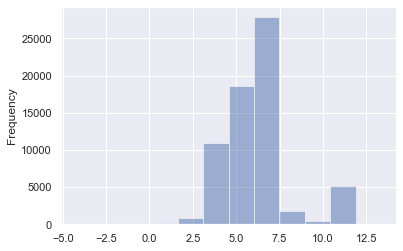

In [84]:
ax = properties_colombia_csv.lat.plot.hist(bins=12, alpha=0.5)

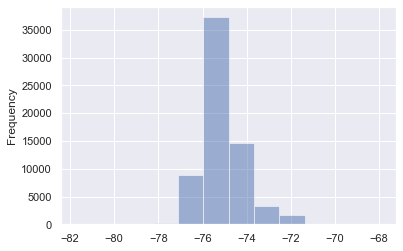

In [85]:
ax = properties_colombia_csv.lon.plot.hist(bins=12, alpha=0.5)

https://machinelearningknowledge.ai/sklearn-feature-scaling-with-standardscaler-minmaxscaler-robustscaler-and-maxabsscaler/

https://www.kaggle.com/code/sudamyasodya/superstore-sales-prediction-my-copy/notebook

In [48]:
columns_scaler=['lat', 'lon', 'bathrooms', 'created_on_year', 'created_on_month',
'created_on_day', 'end_date_year', 'end_date_month', 'end_date_day',
'start_date_year', 'start_date_month', 'start_date_day']

In [49]:
from sklearn.preprocessing import StandardScaler
newdf_5=new_df_4[columns_scaler]
Standar_scaled_features = StandardScaler().fit_transform(newdf_5.values)


In [62]:
print("mean",Standar_scaled_features.mean(axis=0))
print("std",Standar_scaled_features.std(axis=0))


mean [-3.36064594e-16  5.46667411e-15  1.61072539e-16  0.00000000e+00
 -5.12594270e-16 -1.08982257e-16 -6.31233865e-18  8.31394348e-17
  6.94896768e-17  0.00000000e+00 -5.12594270e-16 -1.08982257e-16]
std [1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.]


In [50]:
df=pd.DataFrame(Standar_scaled_features)
#data_ML_car.loc[data_ML_car['carwidth']]=df[
df.columns=columns_scaler

<AxesSubplot:xlabel='lat', ylabel='Density'>

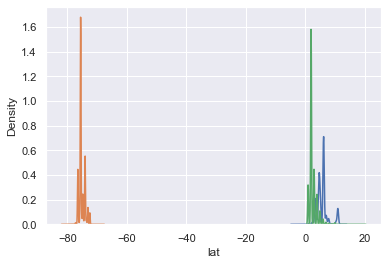

In [90]:
sns.kdeplot(new_df_4["lat"])
sns.kdeplot(new_df_4["lon"])
sns.kdeplot(new_df_4["bathrooms"])


<AxesSubplot:xlabel='lat', ylabel='Density'>

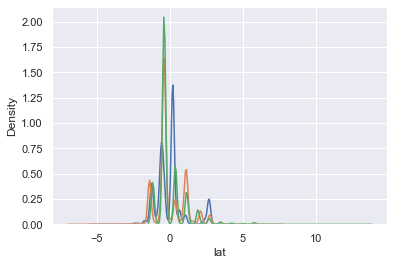

In [91]:
sns.kdeplot(df["lat"])
sns.kdeplot(df["lon"])
sns.kdeplot(df["bathrooms"])

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,65850.0,-3.360646e-16,1.000008,-5.180494,-0.587756,0.181880,0.200347,3.890120
lon,65850.0,5.466674e-15,1.000008,-6.687797,-0.416075,-0.394764,0.958038,7.415596
bathrooms,65850.0,1.610725e-16,1.000008,-1.163271,-0.390651,-0.390651,0.381969,13.516501
created_on_year,65850.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
created_on_month,65850.0,-5.125943e-16,1.000008,-1.797506,-1.150037,0.144901,0.792370,1.439839
created_on_day,65850.0,-1.089823e-16,1.000008,-1.761186,-0.879664,0.112049,0.993572,1.544524
end_date_year,65850.0,-6.312339e-18,1.000008,-0.252591,-0.252591,-0.252591,-0.252063,3.960781
end_date_month,65850.0,8.313943e-17,1.000008,-2.289998,-0.209236,0.385267,0.682519,0.979771
end_date_day,65850.0,6.948968e-17,1.000008,-1.714697,-0.863542,0.094007,0.945161,1.477133
start_date_year,65850.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
columnas_faltantes=['property_type_Apartamento', 'property_type_Casa','property_type_Finca', 'property_type_Local comercial','property_type_Lote', 'property_type_Oficina', 'property_type_Otro','property_type_Parqueadero', 'currency_COP', 'currency_USD']

In [53]:
df_new6=new_df_4[columnas_faltantes].copy()

In [54]:
df[columnas_faltantes]=df_new6[columnas_faltantes].copy()

In [55]:
#remplazo las columnas con el escalado porque al tener diferentes 
# medidas se debe cambiar la escala de las columnas numericas
df

,lat,lon,bathrooms,created_on_year,created_on_month,created_on_day,end_date_year,end_date_month,end_date_day,start_date_year,...,property_type_Apartamento,property_type_Casa,property_type_Finca,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_Parqueadero,currency_COP,currency_USD
0,-0.565452,1.120914,0.381969,0.0,-0.502568,-1.430615,-0.252591,0.088015,-0.544359,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0.200347,-0.394764,0.381969,0.0,0.144901,0.332430,-0.252591,0.385267,0.306795,0.0,...,1,0,0,0,0,0,0,0,1,0
2,0.229434,-0.468839,-1.163271,0.0,0.144901,0.332430,-0.252591,0.385267,0.519584,0.0,...,0,1,0,0,0,0,0,0,1,0
3,0.200347,-0.394764,-0.390651,0.0,1.439839,-0.769473,3.960781,0.979771,1.477133,0.0,...,0,0,0,0,1,0,0,0,1,0
4,0.200347,-0.394764,-0.390651,0.0,1.439839,-0.769473,-0.252591,0.979771,-0.650754,0.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65845,0.205507,-0.439128,-0.390651,0.0,1.439839,-1.650996,-0.252063,-0.209236,-1.501908,0.0,...,1,0,0,0,0,0,0,0,1,0
65846,-0.400331,-0.350159,-1.163271,0.0,-1.797506,1.103762,-0.252591,0.385267,-1.608303,0.0,...,1,0,0,0,0,0,0,0,1,0
65847,-0.388231,-0.512017,-0.390651,0.0,0.792370,-1.210235,-0.252591,0.682519,-1.182725,0.0,...,0,0,0,0,0,0,1,0,1,0
65848,0.684150,2.090792,-0.390651,0.0,1.439839,-0.328712,-0.252591,0.979771,-0.331571,0.0,...,1,0,0,0,0,0,0,0,1,0


In [56]:
df.isnull().sum()

lat                              0
lon                              0
bathrooms                        0
created_on_year                  0
created_on_month                 0
created_on_day                   0
end_date_year                    0
end_date_month                   0
end_date_day                     0
start_date_year                  0
start_date_month                 0
start_date_day                   0
property_type_Apartamento        0
property_type_Casa               0
property_type_Finca              0
property_type_Local comercial    0
property_type_Lote               0
property_type_Oficina            0
property_type_Otro               0
property_type_Parqueadero        0
currency_COP                     0
currency_USD                     0
dtype: int64

aca lo guardo en formato csv a el archivo procesado

In [57]:
df.to_csv("columbia_houses_test.csv", index=False)